In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd 
import numpy as np
from pandas import Series, DataFrame
from numpy import nan as NA
from datetime import datetime, date
from pandas.tseries.offsets import MonthEnd

<h2>Заргрузка исходных данных</h2>

In [3]:
report = pd.read_pickle('/Users/popov/Documents/Python/Pybursa/Web/report_pickle')
data = pd.read_pickle('/Users/popov/Documents/Python/Pybursa/Web/data_pickle')

In [4]:
offset = MonthEnd()
curr_month = report.index[-1]
prev_month, next_month = curr_month - offset, curr_month + offset

<h3>Отчётный месяц</h3>

In [5]:
'{:%B %Y}'.format(curr_month)

'June 2019'

<h2>Основная таблица</h2>

In [6]:
rep_2017 = report['2017':]
rep_2018 = report['2018':] # данные за 2018 год
rep_2019 = rep_2018.tail(13)
rep_2019

channels                           goals                       
             yandex google go.mail.ru bry cpc order basket contact measure
2018-06-30     2361   2369         32   3   0     7     64     150      17
2018-07-31     2435   2513         69   1   0     7     51     184       7
2018-08-31     2637   2437         59   1   0     5    115     161       9
2018-09-30     2591   2343         85   4   0     2     84     134       9
2018-10-31     2746   2665         77   2   0     7     86     166      12
2018-11-30     2914   2444         61   3   0     5    162     182      24
2018-12-31     2948   2292         72   4   0     4    116     211      11
2019-01-31     3234   2440        122   4   0     8    113     166       9
2019-02-28     2925   2222        142   8   0     4     96     179      29
2019-03-31     2938   2223         86   2   0     9    149     190      28
2019-04-30     2994   2174         38   5   0     2     78     156      13
2019-05-31     2902   2059         22   1   0     6    117     143      16
2019-06-30     2989   1967         25   2   0    12     95     174      26

<h3>Разница между отчетным и предшествующим месяцами</h3>

In [7]:
rep_diff = report.diff(periods=1) # разница от месяца к месяцу
rep_diff[curr_month:].astype(int) # разница между предыдущим и отчетным месяцами

channels                           goals                       
             yandex google go.mail.ru bry cpc order basket contact measure
2019-06-30       87    -92          3   1   0     6    -22      31      10

<h2>Графики</h2>
<h3>Столбчатая диаграмма соотношения каналов трафика</h3>

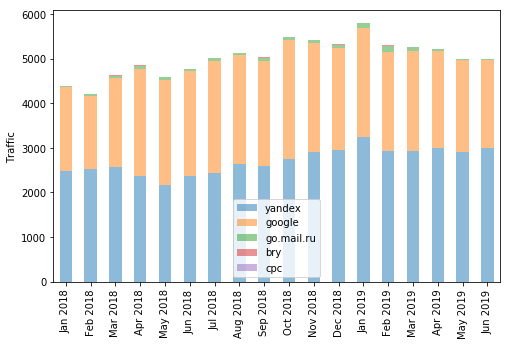

In [43]:
from matplotlib.dates import WeekdayLocator, MonthLocator, DateFormatter
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1, 1, 1)
rep_2018.channels.plot(ax=ax, kind='bar', stacked=True, alpha=0.5);
ax.set_ylabel('Traffic');
ax.legend(loc='lower center');

#fig.autofmt_xdate()
ticks = ax.set_xticklabels(['{:%b %Y}'.format(x) for x in rep_2018.index]);

#ax.plot_date (rep_2018.channels.index.to_pydatetime(), rep_2018.channels)
#weekday_locator = WeekdayLocator(byweekday=(0), interval=1)
#ax.xaxis.set_minor_locator(MonthLocator())
#ax.xaxis.set_minor_formatter(DateFormatter("%b"))
#ax.xaxis.set_major_locator(MonthLocator())
#ax.xaxis.set_major_formatter(DateFormatter("\n\n%Y"))

<h3>Линейная диаграмма изменений трафика</h3>

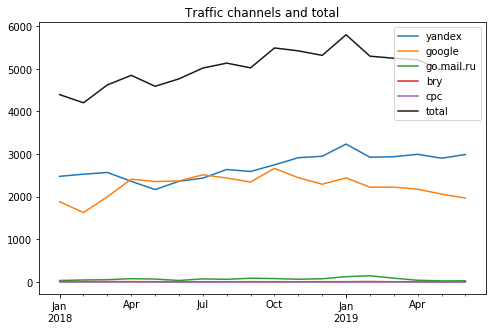

In [44]:
fig = plt.figure(figsize=(8,5));
ax = fig.add_subplot(111);
rep_2018.channels.plot(ax=ax);
rep_2018.channels.sum(axis=1).plot(color=(0,0,0), linewidth=1.5, alpha=.9, label='total');
ax.set_title('Traffic channels and total')
ax.legend(loc='upper right');

<h2>Табличные данные</h2>
<h3>Ключевые слова и количество визитов</h3>

In [45]:
kw = 'keyword visit'.split()

In [46]:
data.visit = data.visit.astype(int)
data[kw]

keyword  visit
bing       0                                    двери ясень жемчуг      1
go.mail.ru 0                                             (not set)     25
google     0                                         дешевые двери    269
           1                                          двери дешево    210
           2                                       двери из дерева     86
           3                                      np - /?pid=pokaz     58
           4                             np - /?cnt=catalog&r=2438     45
           5                             np - /?cnt=catalog&r=1428     33
           6                                                np - /     30
           7                                дверные полотна купить     26
           8                          недорогие межкомнатные двери     26
           9                                         двери продажа     21
           10                                 дверное полотно цена     13
           11                                      полотна дверные     10
           12                                      дверное полотно      8
           13                                      недорогие двери      7
           14                                       двери в ванную      6
           15                                        полотно двери      6
           16                              np - /?pid=menu-katalog      5
           17                               дверное полотно дешево      5
           18                                      дверные полотна      4
           19                            np - /?cnt=catalog&r=1792      3
           20                                      двери комнатные      3
           21                                        двери полотно      3
           22                                     двери с коробкой      3
           23                             np - /?cnt=catalog&r=156      2
           24                            np - /?cnt=catalog&r=1697      2
           25                            np - /?cnt=catalog&r=1809      2
           26                                 np - /?pid=pricelist      2
           27                               дверное полотно купить      2
...                                                            ...    ...
yandex     2047  eshiklar romlar дверные полотна sell photo whe...      1
           2048  estet двери дверь style стиль 5 600х2000мм тол...      1
           2049  estet двери дверь омега 600х2000мм только поло...      1
           2050  estet двери дверь сириус 1 узкое 600х2000мм то...      1
           2051     estet двери официальный сайт or or or or or or      1
           2052                estet двери официальный сайт москва      1
           2053  estet двери светлые дверь сириус 1 узкое 600х2...      1
           2054  family door полотно дверное rada polo исполнен...      1
           2055                    Favorite двери официальный сайт      1
           2056                     ferroni двери официальный сайт      1
           2057  ff oksamanty 3p размер дверного полотна 990x20...      1
           2058  ff puuvalmis 3p размер дверного полотна 990х20...      1
           2059  figurniy+ doska+ dver как самостоятельно измен...      1
           2060  flexline гибкие линии производства автоматичес...      1
           2061  fold компл роликов и аксессуаров для складной ...      1
           2062           ford ecosport внедорожник 5 дверей салон      1
           2063  fortunato 810 белый стипл 2000800 спальня двер...      1
           2064               foto механизм для межкомнатной двери      1
           2065  g44n варианты прихожей дверь на кухне с газово...      1
           2066                     gardesa двери официальный сайт      1
           2067                  genoa магазин дверей во владимире      1
           2068                       geona двери официальный сайт      1
           2069  geona двери официальный сайт цены москва двери

<h3>Самые популярные ключевые слова по каждой поисковой системе</h3>

In [47]:
data.groupby(level=0, axis=0)[kw].apply(lambda x: x.xs(x.visit.idxmax())) #.xs(0, level=1)

,keyword,visit
bing,двери ясень жемчуг,1
go.mail.ru,(not set),25
google,дешевые двери,269
yahoo,np - /?pid=rassrochka,1
yandex,дверь гармошка,152


<h3>Топ-5 запросов по каждой поисковой системе</h3>

In [48]:
data_grupped = data.sort_values('visit', ascending=False).groupby(level=0, axis=0) # группировка по поисковой системе
data_top5 = data_grupped[['keyword', 'visit']].apply(lambda x: x.iloc[:5]) # топ-5 каждой ПС
data_top5.reset_index(level=0).drop('level_0', axis=1)

keyword  visit
bing       0                     двери ясень жемчуг      1
go.mail.ru 0                              (not set)     25
google     0                          дешевые двери    269
           1                           двери дешево    210
           2                        двери из дерева     86
           3                       np - /?pid=pokaz     58
           4              np - /?cnt=catalog&r=2438     45
yahoo      0                  np - /?pid=rassrochka      1
yandex     3                         дверь гармошка    152
           4                         двери гармошка     82
           5            дверь гармошка межкомнатная     43
           6            двери гармошка межкомнатные     30
           7  двери гармошка в леруа мерлен каталог     29